# 👩🏻‍💻 Bixi Project 🏫👩🏻‍💻

## 📥 Import packages 📥

In [1]:
import pandas as pd
import numpy as np 
!pip install geopy # to calculate distance with Longitude and latitude
from scipy.stats import linregress #Create linear regression
import matplotlib.pyplot as plt # To create scatter plots and others
from geopy.distance import geodesic # to calculate distance with Longitude and latitude


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


### 📥🚲 Import CSV - Bixi data - Bike Share Service 🚲📥

In [2]:
df_july = pd.read_csv('C:/Users/Bernier/OneDrive - Powercorp/UChicago/OD_2017.csv', low_memory=False)
df_Stations = pd.read_csv('C:/Users/Bernier/OneDrive - Powercorp/UChicago/Stations_2017_Data.csv')

### Describe the data sets

In [3]:
print(df_july.head(2))
print(df_july.info())
print(df_july.describe())
print(df_july.columns)
print(df_july.shape)

   Unnamed: 0        start_date  start_station_code          end_date  \
0           0  2017-04-15 00:00                7060  2017-04-15 00:31   
1           1  2017-04-15 00:01                6173  2017-04-15 00:10   

  end_station_code  duration_sec  is_member  
0             7060          1841          1  
1             6173           553          1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018722 entries, 0 to 4018721
Data columns (total 7 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Unnamed: 0          int64 
 1   start_date          object
 2   start_station_code  int64 
 3   end_date            object
 4   end_station_code    object
 5   duration_sec        int64 
 6   is_member           int64 
dtypes: int64(4), object(3)
memory usage: 214.6+ MB
None
         Unnamed: 0  start_station_code  duration_sec     is_member
count  4.018722e+06        4.018722e+06  4.018722e+06  4.018722e+06
mean   2.009360e+06        6.324815e+03  8.374504

In [4]:
print(df_Stations.head())
print(df_Stations.columns)
print(df_Stations.info())

   Unnamed: 0  code                     name   latitude  longitude  is_public  \
0           0  7060  de l'Église / de Verdun  45.463001 -73.571569          1   
1           1  6173         Berri / Cherrier  45.519088 -73.569509          1   
2           2  6203   Hutchison / Sherbrooke  45.507810 -73.572080          1   
3           3  6204        Milton / Durocher  45.508144 -73.574772          1   
4           4  6104    Wolfe / René-Lévesque  45.516818 -73.554188          1   

  elevation  
0        18  
1        42  
2         e  
3        48  
4        21  
Index(['Unnamed: 0', 'code', 'name', 'latitude', 'longitude', 'is_public',
       'elevation'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  546 non-null    int64  
 1   code        546 non-null    int64  
 2   name        546 non-null    object 
 3

### 🔗 Merge two data sets 🔗

In [5]:
df_July_Rides = pd.merge(df_july, df_Stations[['latitude','longitude','code','elevation']], left_on = 'start_station_code', right_on = 'code', how = 'left')
df_July_Rides.rename(columns = {'latitude' : 'StartLatitude','longitude' : 'StartLongitude', 'elevation' : 'StartElevation'}, inplace = True)
df_July_Rides = df_July_Rides.drop('code', axis=1)
df_July_Rides.head()
#column_headers = list(df_July_Rides.columns.values)
#print("The Column Header :", column_headers)

,Unnamed: 0,start_date,start_station_code,end_date,end_station_code,duration_sec,is_member,StartLatitude,StartLongitude,StartElevation
0,0,2017-04-15 00:00,7060,2017-04-15 00:31,7060,1841,1,45.463001,-73.571569,18
1,1,2017-04-15 00:01,6173,2017-04-15 00:10,6173,553,1,45.519088,-73.569509,42
2,2,2017-04-15 00:01,6203,2017-04-15 00:04,6204,195,1,45.507810,-73.572080,e
3,3,2017-04-15 00:01,6104,2017-04-15 00:06,6114,285,1,45.516818,-73.554188,21
4,4,2017-04-15 00:01,6174,2017-04-15 00:11,6174,569,1,45.519080,-73.572700,46


In [6]:
a = df_July_Rides['end_station_code'].unique()
print(sorted(a))
counts = df_July_Rides['end_station_code'].value_counts()
print(counts)

['10002', '5002', '5003', '5004', '5005', '5006', '5007', '6001', '6002', '6003', '6004', '6005', '6006', '6007', '6008', '6009', '6011', '6012', '6013', '6014', '6015', '6016', '6017', '6018', '6019', '6020', '6021', '6022', '6023', '6024', '6025', '6026', '6027', '6029', '6031', '6032', '6033', '6034', '6035', '6036', '6037', '6038', '6039', '6040', '6041', '6042', '6043', '6044', '6046', '6047', '6048', '6049', '6050', '6051', '6052', '6053', '6057', '6058', '6059', '6060', '6061', '6062', '6063', '6064', '6065', '6066', '6067', '6068', '6070', '6072', '6073', '6075', '6076', '6078', '6079', '6080', '6081', '6082', '6083', '6084', '6085', '6086', '6087', '6088', '6089', '6090', '6091', '6092', '6093', '6094', '6095', '6096', '6097', '6098', '6099', '6100', '6101', '6102', '6103', '6104', '6105', '6106', '6107', '6108', '6109', '6110', '6111', '6112', '6113', '6114', '6115', '6116', '6117', '6118', '6119', '6120', '6121', '6122', '6123', '6124', '6125', '6126', '6127', '6128', '6129'

In [7]:
df_July_Rides = df_July_Rides[df_July_Rides['end_station_code'] != "Tabletop (RMA)"]
counts = df_July_Rides['end_station_code'].value_counts()
print(counts)

end_station_code
6015    52989
6100    48546
6012    42432
6078    42190
6026    37636
        ...  
7075      599
5005      562
5002      436
5004      382
5003      365
Name: count, Length: 546, dtype: int64


In [8]:
df_July_Rides['end_station_code'] = df_July_Rides['end_station_code'].astype('int64')
df_Stations['code'] = df_Stations['code'].astype('int64')


In [9]:

df_July_Rides1 = pd.merge(df_July_Rides, df_Stations[['latitude','longitude','code','elevation']], left_on = 'end_station_code', right_on = 'code', how = 'left')
df_July_Rides1.rename(columns = {'latitude' : 'EndLatitude','longitude' : 'EndLongitude', 'elevation' : 'EndElevation'}, inplace = True)
df_July_Rides1 = df_July_Rides1.drop('code', axis=1)
print(df_July_Rides1.head())

   Unnamed: 0        start_date  start_station_code          end_date  \
0           0  2017-04-15 00:00                7060  2017-04-15 00:31   
1           1  2017-04-15 00:01                6173  2017-04-15 00:10   
2           2  2017-04-15 00:01                6203  2017-04-15 00:04   
3           3  2017-04-15 00:01                6104  2017-04-15 00:06   
4           4  2017-04-15 00:01                6174  2017-04-15 00:11   

   end_station_code  duration_sec  is_member  StartLatitude  StartLongitude  \
0              7060          1841          1      45.463001      -73.571569   
1              6173           553          1      45.519088      -73.569509   
2              6204           195          1      45.507810      -73.572080   
3              6114           285          1      45.516818      -73.554188   
4              6174           569          1      45.519080      -73.572700   

  StartElevation  EndLatitude  EndLongitude EndElevation  
0             18    45.4630

In [10]:
print(df_July_Rides1.head(100))
print(df_July_Rides1.info())
print(df_July_Rides1.describe())
print(df_July_Rides1.columns)
print(df_July_Rides1.shape)

    Unnamed: 0        start_date  start_station_code          end_date  \
0            0  2017-04-15 00:00                7060  2017-04-15 00:31   
1            1  2017-04-15 00:01                6173  2017-04-15 00:10   
2            2  2017-04-15 00:01                6203  2017-04-15 00:04   
3            3  2017-04-15 00:01                6104  2017-04-15 00:06   
4            4  2017-04-15 00:01                6174  2017-04-15 00:11   
..         ...               ...                 ...               ...   
95          95  2017-04-15 00:35                6188  2017-04-15 01:04   
96          96  2017-04-15 00:35                6063  2017-04-15 00:40   
97          97  2017-04-15 00:35                6910  2017-04-15 00:50   
98          98  2017-04-15 00:36                6070  2017-04-15 00:43   
99          99  2017-04-15 00:36                6096  2017-04-15 00:41   

    end_station_code  duration_sec  is_member  StartLatitude  StartLongitude  \
0               7060          1

### Please try to do something Else, Maybe delete the data before that is not working

In [11]:
df_July_Rides1['EndElevation'] = pd.to_numeric(df_July_Rides1['EndElevation'], errors='coerce')
df_July_Rides1['StartElevation'] = pd.to_numeric(df_July_Rides1['StartElevation'], errors='coerce')



### ⛰️ Calculate Elevation variation ⛰️

In [12]:
df_July_Rides1['VariationElevation'] = df_July_Rides1.apply(lambda x: x['EndElevation'] - x['StartElevation'], axis =1)


In [13]:
print(df_July_Rides1.head())

   Unnamed: 0        start_date  start_station_code          end_date  \
0           0  2017-04-15 00:00                7060  2017-04-15 00:31   
1           1  2017-04-15 00:01                6173  2017-04-15 00:10   
2           2  2017-04-15 00:01                6203  2017-04-15 00:04   
3           3  2017-04-15 00:01                6104  2017-04-15 00:06   
4           4  2017-04-15 00:01                6174  2017-04-15 00:11   

   end_station_code  duration_sec  is_member  StartLatitude  StartLongitude  \
0              7060          1841          1      45.463001      -73.571569   
1              6173           553          1      45.519088      -73.569509   
2              6204           195          1      45.507810      -73.572080   
3              6114           285          1      45.516818      -73.554188   
4              6174           569          1      45.519080      -73.572700   

   StartElevation  EndLatitude  EndLongitude  EndElevation  VariationElevation  
0    

In [14]:
df_July_Rides1 = df_July_Rides1.dropna(subset=['VariationElevation'])

In [15]:
print(df_July_Rides1.head())

   Unnamed: 0        start_date  start_station_code          end_date  \
0           0  2017-04-15 00:00                7060  2017-04-15 00:31   
1           1  2017-04-15 00:01                6173  2017-04-15 00:10   
3           3  2017-04-15 00:01                6104  2017-04-15 00:06   
4           4  2017-04-15 00:01                6174  2017-04-15 00:11   
6           6  2017-04-15 00:02                6223  2017-04-15 00:13   

   end_station_code  duration_sec  is_member  StartLatitude  StartLongitude  \
0              7060          1841          1      45.463001      -73.571569   
1              6173           553          1      45.519088      -73.569509   
3              6114           285          1      45.516818      -73.554188   
4              6174           569          1      45.519080      -73.572700   
6              6148           679          1      45.517000      -73.589000   

   StartElevation  EndLatitude  EndLongitude  EndElevation  VariationElevation  
0    

In [16]:
df_July_Rides1 = df_July_Rides1.iloc[:1000000]


In [17]:
!pip install geopy
from scipy.stats import linregress


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
from geopy.distance import geodesic

# Define a function to calculate the geodesic distance
def calculate_distance(row):
    start_coords = (row['StartLatitude'], row['StartLongitude'])
    end_coordsOther = (row['EndLatitude'], row['EndLongitude'])
    return geodesic(start_coords, end_coordsOther).kilometers  # Distance in kilometers

# Apply the function to calculate distance for each row
df_July_Rides1['Distance_km'] = df_July_Rides1.apply(calculate_distance, axis=1)

# Apply the function to calculate distance for each row
df_July_Rides1['Distance_km'] = df_July_Rides1.apply(calculate_distance, axis=1)

In [32]:
# Find coordinates of station code 6046
station_6046 = df_Stations[df_Stations['code'] == 6046].iloc[0]
end_coords_Downtown = (station_6046['latitude'], station_6046['longitude'])

print(end_coords_Downtown)

# Function to calculate distance from each station to station 6046
def calculate_distance_downtown(row):
    start_coords = (row['StartLatitude'], row['StartLongitude'])
    return geodesic(start_coords, end_coords_Downtown).kilometers  # Distance in kilometers

# Apply function to calculate distance for each station
df_July_Rides1['distance_to_6046'] = df_July_Rides1.apply(calculate_distance_downtown, axis=1)

(45.49871, -73.56671)


In [ ]:
print(df_July_Rides1.head())

   Unnamed: 0        start_date  start_station_code          end_date  \
0           0  2017-04-15 00:00                7060  2017-04-15 00:31   
1           1  2017-04-15 00:01                6173  2017-04-15 00:10   
3           3  2017-04-15 00:01                6104  2017-04-15 00:06   
4           4  2017-04-15 00:01                6174  2017-04-15 00:11   
6           6  2017-04-15 00:02                6223  2017-04-15 00:13   

   end_station_code  duration_sec  is_member  StartLatitude  StartLongitude  \
0              7060          1841          1      45.463001      -73.571569   
1              6173           553          1      45.519088      -73.569509   
3              6114           285          1      45.516818      -73.554188   
4              6174           569          1      45.519080      -73.572700   
6              6148           679          1      45.517000      -73.589000   

   StartElevation  EndLatitude  EndLongitude  EndElevation  \
0            18.0    45.

In [ ]:
result = linregress(df_July_Rides1['duration_sec'], df_July_Rides1['Distance_km'])
slope = result.slope
intercept = result.intercept


C:\Users\Bernier\AppData\Local\pypoetry\Cache\virtualenvs\capitallogic-ooC4wino-py3.10\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



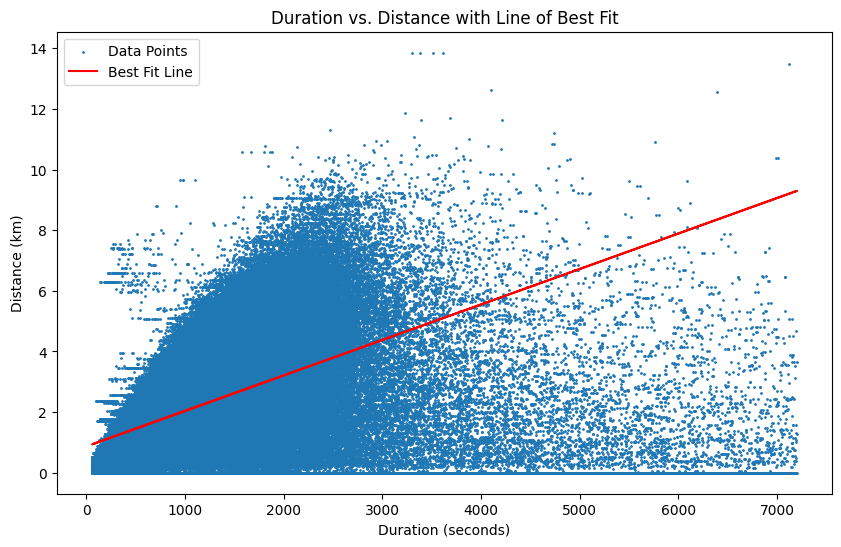

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_July_Rides1['duration_sec'], df_July_Rides1['Distance_km'], s=1, label="Data Points")
plt.plot(df_July_Rides1['duration_sec'], slope * df_July_Rides1['duration_sec'] + intercept, color='red', label="Best Fit Line")
plt.title("Duration vs. Distance with Line of Best Fit")
plt.xlabel("Duration (seconds)")
plt.ylabel("Distance (km)")
plt.legend()  # Show legend

plt.show()



c:\Users\Bernier\AppData\Local\pypoetry\Cache\virtualenvs\capitallogic-ooC4wino-py3.10\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


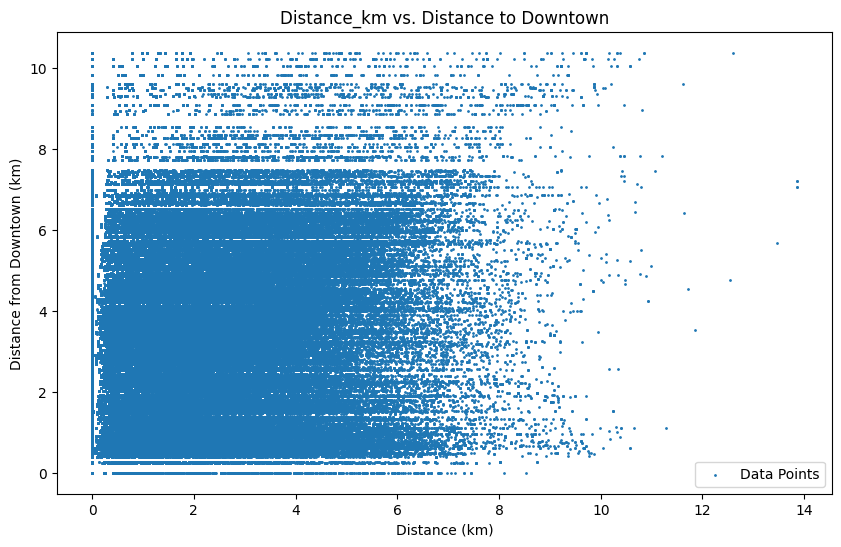

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_July_Rides1['Distance_km'], df_July_Rides1['distance_to_6046'], s=1, label="Data Points")

plt.title("Distance_km vs. Distance to Downtown")
plt.xlabel("Distance (km)")
plt.ylabel("Distance from Downtown (km)")
plt.legend() 

plt.show()


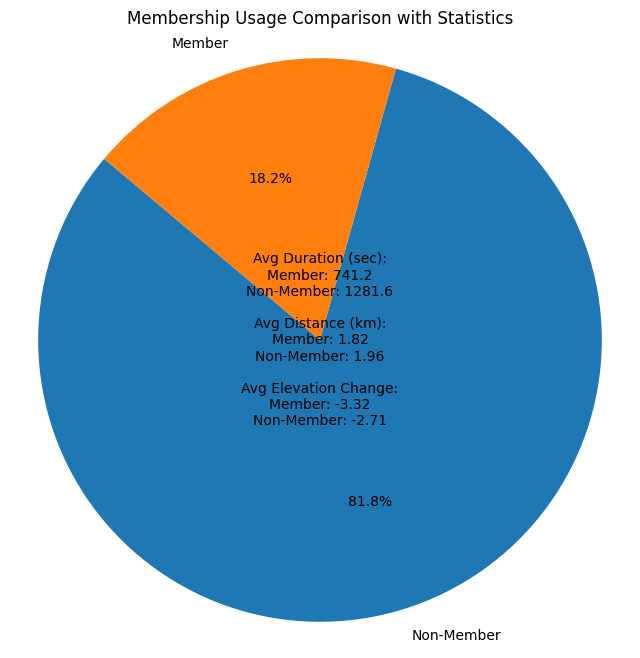

In [ ]:
import matplotlib.pyplot as plt


membership_counts = df_July_Rides1['is_member'].value_counts()
avg_duration = df_July_Rides1.groupby('is_member')['duration_sec'].mean()
avg_distance = df_July_Rides1.groupby('is_member')['Distance_km'].mean()
avg_elevation = df_July_Rides1.groupby('is_member')['VariationElevation'].mean()

labels = ['Non-Member', 'Member']
sizes = membership_counts.tolist()

# Create pie chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Add statistics to the center
plt.text(0, 0, f"Avg Duration (sec):\nMember: {avg_duration[1]:.1f}\nNon-Member: {avg_duration[0]:.1f}\n\n"
               f"Avg Distance (km):\nMember: {avg_distance[1]:.2f}\nNon-Member: {avg_distance[0]:.2f}\n\n"
               f"Avg Elevation Change:\nMember: {avg_elevation[1]:.2f}\nNon-Member: {avg_elevation[0]:.2f}",
         ha='center', va='center', fontsize=10)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')
plt.title('Membership Usage Comparison with Statistics')
plt.show()


C:\Users\Bernier\AppData\Local\pypoetry\Cache\virtualenvs\capitallogic-ooC4wino-py3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



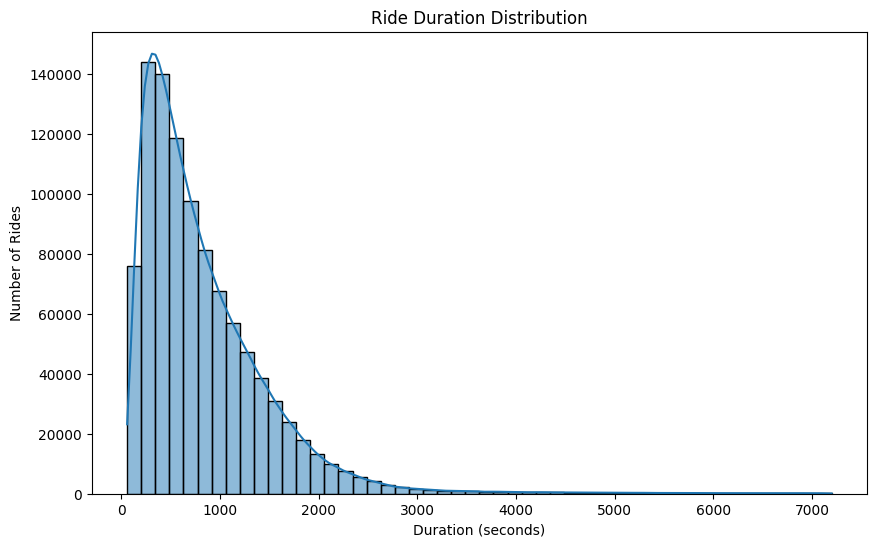

In [ ]:
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_July_Rides1['duration_sec'], bins=50, kde=True)
plt.title('Ride Duration Distribution')
plt.xlabel('Duration (seconds)')
plt.ylabel('Number of Rides')
plt.show()


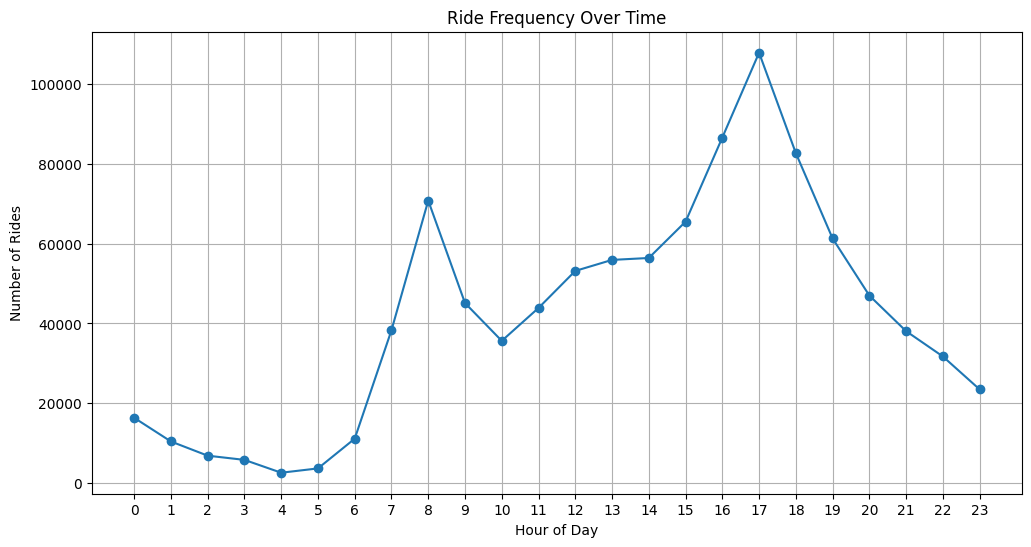

In [22]:
# Convert 'start_date' to datetime and extract hour
df_July_Rides1['start_date'] = pd.to_datetime(df_July_Rides1['start_date'])
df_July_Rides1['hour'] = df_July_Rides1['start_date'].dt.hour

# Group by hour and count rides
rides_per_hour = df_July_Rides1.groupby('hour').size()

# Plot
plt.figure(figsize=(12, 6))
rides_per_hour.plot(kind='line', marker='o')
plt.title('Ride Frequency Over Time')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


C:\Users\Bernier\AppData\Local\Temp\ipykernel_11756\1110538207.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_distance_per_bin = df_July_Rides1.groupby('distance_bin')['Distance_km'].mean().reset_index()


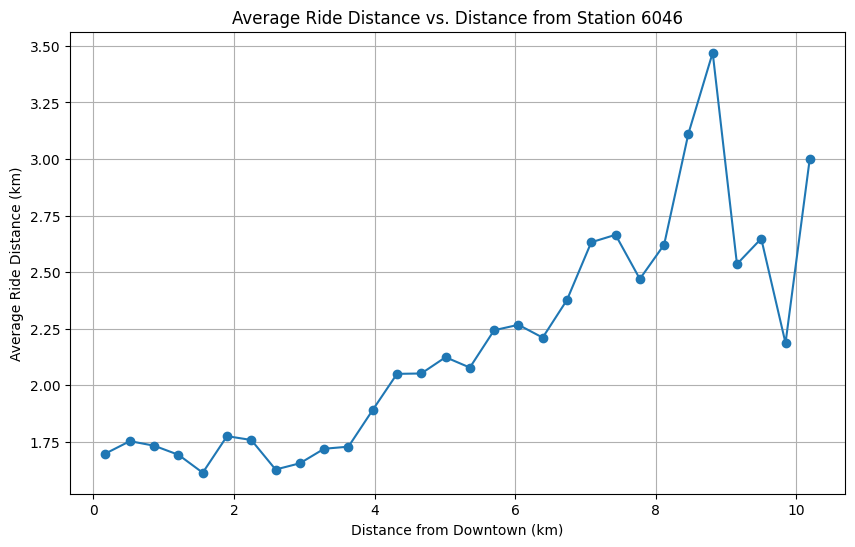

In [35]:
# Assuming 'distance_to_6046' and 'Distance_km' are columns in your dataframe

# Create bins for 'distance_to_6046'
df_July_Rides1['distance_bin'] = pd.cut(df_July_Rides1['distance_to_6046'], bins=30)

# Calculate average ride distance for each bin
avg_distance_per_bin = df_July_Rides1.groupby('distance_bin')['Distance_km'].mean().reset_index()

# Prepare data for plotting
avg_distance_per_bin['bin_center'] = avg_distance_per_bin['distance_bin'].apply(lambda x: x.mid)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(avg_distance_per_bin['bin_center'], avg_distance_per_bin['Distance_km'], marker='o')
plt.title('Average Ride Distance vs. Distance from Station 6046')
plt.xlabel('Distance from Downtown (km)')
plt.ylabel('Average Ride Distance (km)')
plt.grid(True)
plt.show()


In [29]:
print(df_July_Rides1.columns)


Index(['Unnamed: 0', 'start_date', 'start_station_code', 'end_date',
       'end_station_code', 'duration_sec', 'is_member', 'StartLatitude',
       'StartLongitude', 'StartElevation', 'EndLatitude', 'EndLongitude',
       'EndElevation', 'VariationElevation', 'Distance_km', 'hour', 'day',
       'year', 'year_day'],
      dtype='object')


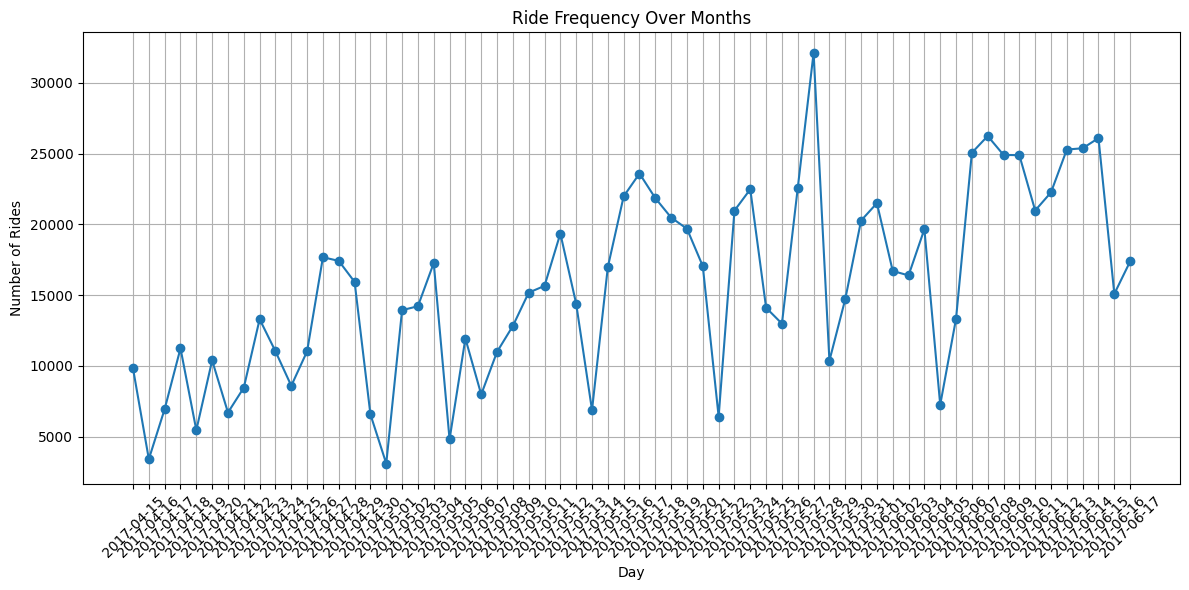

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'start_date' is in datetime format
df_July_Rides1['start_date'] = pd.to_datetime(df_July_Rides1['start_date'])

# Extract the month and year from 'start_date'
df_July_Rides1['day'] = df_July_Rides1['start_date'].dt.day
df_July_Rides1['year'] = df_July_Rides1['start_date'].dt.year

# If your data spans multiple years, combine year and month
df_July_Rides1['year_day'] = df_July_Rides1['start_date'].dt.to_period('D')

# Group by 'year_month' and count rides
rides_per_month = df_July_Rides1.groupby('year_day').size().reset_index(name='ride_count')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(rides_per_month['year_day'].astype(str), rides_per_month['ride_count'], marker='o')
plt.title('Ride Frequency Over Months')
plt.xlabel('Day')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Frequency')

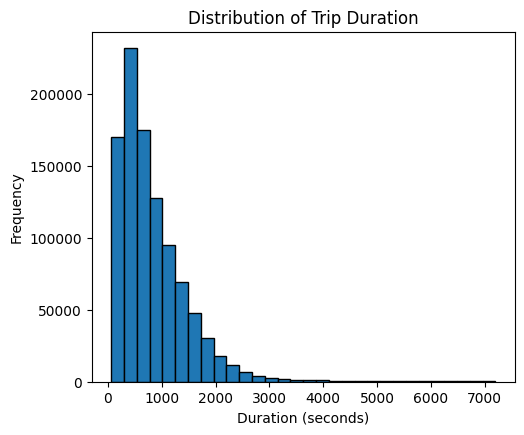

In [25]:
import matplotlib.pyplot as plt

# Set up the figure with multiple plots
plt.figure(figsize=(12, 10))

# 1. Histogram for trip duration
plt.subplot(2, 2, 1)
plt.hist(df_July_Rides1['duration_sec'], bins=30, edgecolor='black')
plt.title('Distribution of Trip Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')

In [ ]:
pip install geopandas


Note: you may need to restart the kernel to use updated packages.


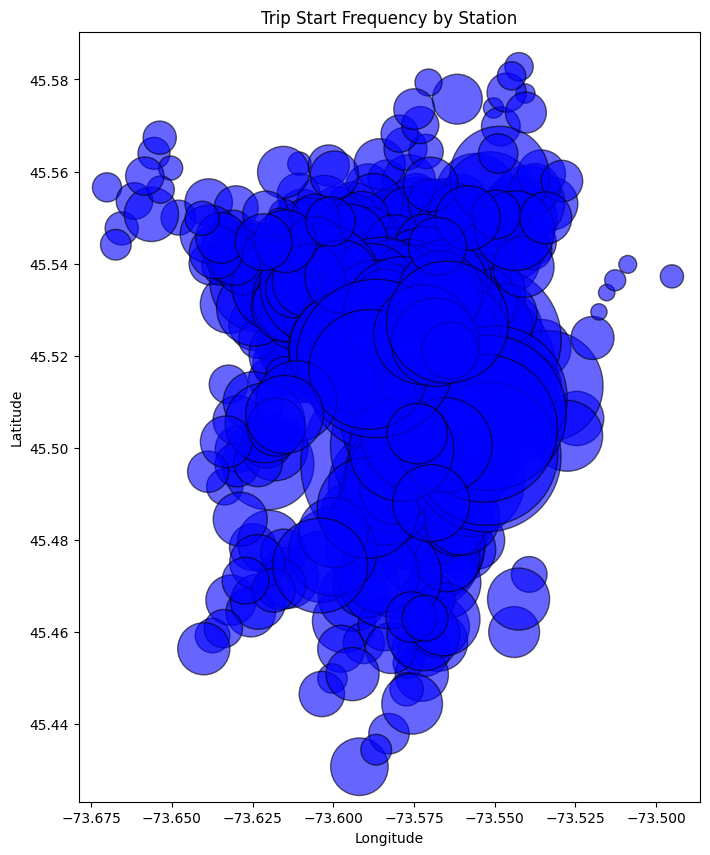

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Ensure DataFrame has required columns and no missing coordinates
if 'start_longitude' in df_July_Stations and 'start_latitude' in df_July_Stations:
    df_July_Stations.dropna(subset=['start_longitude', 'start_latitude'], inplace=True)

    # Convert to GeoDataFrame and set CRS
    df_July_Stations['start_geometry'] = gpd.points_from_xy(df_July_Stations['start_longitude'], df_July_Stations['start_latitude'])
    gdf_start = gpd.GeoDataFrame(df_July_Stations, geometry='start_geometry', crs="EPSG:4326")

    # Aggregate trip counts per start station
    start_station_counts = gdf_start.groupby(['start_station_name', 'start_latitude', 'start_longitude']).size().reset_index(name='trip_count')

    # Convert to GeoDataFrame for easy mapping
    start_station_counts['geometry'] = gpd.points_from_xy(start_station_counts['start_longitude'], start_station_counts['start_latitude'])
    gdf_counts = gpd.GeoDataFrame(start_station_counts, geometry='geometry', crs="EPSG:4326")

    # Plot station locations with point size based on trip count
    fig, ax = plt.subplots(figsize=(10, 10))
    gdf_counts.plot(
        ax=ax,
        color='blue',
        markersize=gdf_counts['trip_count'] * 2,
        alpha=0.6,
        edgecolor='k',
        legend=True
    )

    # Add title and labels
    plt.title('Trip Start Frequency by Station')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # Show plot
    plt.show()

else:
    print("Missing 'start_longitude' or 'start_latitude' in the data.")
